# Machine Learning Kaggle project
## Google Play Store Apps Project
Amr Mohamed Gaber <br>
March 1st, 2020


## Project Overview
### Problem Statement
This project aims to use the dataset provided by [Lavanya Gupta](https://www.kaggle.com/lava18/google-play-store-apps) to train a supervised machine learning algorithm to predict app ratings.

**A supervised machine learning algorithm** is an algorithm where you feed to the algorithm your training dataset including your desired solutions *'labels'* so it can find correlations between instances in the data which leads to it understanding the dataset better.

To predict the target numerical value `'Rating'`, We will be using Regression Algorithms given a set of predictors *'features'*.

### Getting the data
First, We will need to download the dataset using kaggle's api into a new folder we created inside our working directory called ' ..\datasets\gplay\ ', by running the following code:

In [1]:
import os
import kaggle

GPLAY_PATH = os.path.join("datasets", "gplay")
GPLAY_URL = "lava18/google-play-store-apps"

def fetch_gplay_data(gplay_url=GPLAY_URL, gplay_path=GPLAY_PATH):
    '''
    Creates a datasets/gplay directory in your workspace,
    downloads the google-play-store-apps.zip file,
    and extract its files in this directory
    '''
    if not os.path.isdir(gplay_path):
        os.makedirs(gplay_path)
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(gplay_url, path=gplay_path, unzip=True)

In [2]:
fetch_gplay_data()

Then Loading the data from the `googleplaystore.csv` file into our working space by running the following code:

In [3]:
import pandas as pd

def load_gplay_data(gplay_path=GPLAY_PATH):
    csv_path = os.path.join(gplay_path, "googleplaystore.csv")
    return pd.read_csv(csv_path)

In [4]:
gplay = load_gplay_data()
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Exploration
The input data consists of 10841 apps. Every Instance cosists of 12 features and 1 output or label target.
* **App:** Application name.
* **Category:** Category the app belongs to, there is a total of 33 unique catagory in this dataset.
* **Reviews:** Number of user reviews for the app (as when scraped).
* **Size:** Size of the app (as when scraped).
* **Installs:** Number of user downloads/installs for the app (as when scraped).
* **Type:** Paid or Free.
* **Price:** Price of the app (as when scraped)
* **Content Rating:** Age group the app is targeted at - Children / Mature 21+ / Adult.
* **Genres:** An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres, there is a total of 115 unique genre in this dataset.
* **Rating (label):** Overall user rating of the app (as when scraped).

**THIS features are UNNECESSARY and can be dropped from our dataset without affecting it too much:**
* **Last Updated:** Date when the app was last updated on Play Store (as when scraped).
* **Current Ver:** Current version of the app available on Play Store (as when scraped)
* **Android Ver:** Min required Android version (as when scraped)


In [5]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
gplay.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**we will drop NaN values for simplicity, since the objective is to predict the ratings of the apps.**

In [7]:
gplay.dropna(inplace=True)

we will be using the `In-place` operation which is an operation that changes directly the content of a given linear algebra, 
vector, matrices(Tensor) without making a copy.

In [8]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Assumptions
The features: 'Last Updated', 'Current Ver', and 'Android Ver' will have a little to no effect on the training algorithm as they are in my opinion not an important aspect when looking into installing a new app.
- **Last Updated:** this can mean that it is a final product and it needs no further improvment or fixes, but can also mean it is abandoned.
* **Current Ver:** this will be different from app to app depending on the developers, so there is no point keeping it.
* **Android Ver:** most of the time, users who can already install the app on their phone and hence do not have an older version of andriord, will only rate the app, also it is backward compatiable so no point in keeping it either.

In [9]:
gplay.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

## Taking a quick look at the Data Structure 
We will go through each feature visualizing it, cleaning it, and breaking it down.

Lets start by visualizing the first feature `'Category'`  in a pie chart to figure how many categories are there, and we will use multiple colors from different cmaps to represent each of them:

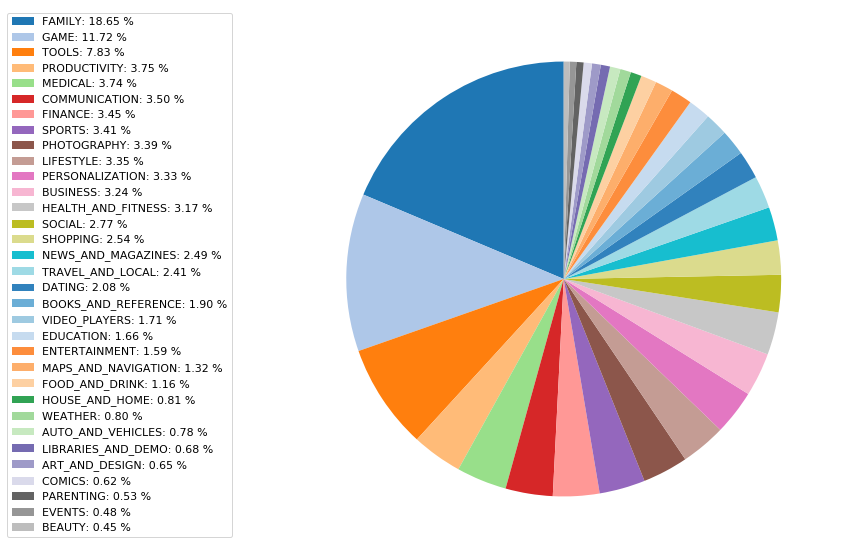

In [10]:
# visualizing 'Category' feature 

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,10))

x = gplay['Category'].value_counts().index #gets the labels
y = gplay['Category'].value_counts() #gets the count for each label
n = gplay['Category'].value_counts().count() #get the total count for this feature

percent = 100.*y/y.sum()

cmap = plt.get_cmap('tab20')
color1 = [cmap(i) for i in np.linspace(0, 1, n//2+1)]
cmap = plt.get_cmap('tab20c')
color2 = [cmap(i) for i in np.linspace(0, 1, n//2+1)]

colors = color1 + color2

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1)

labels = ['{0}: {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = False #incase you want them to be sorted according to their count

if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=11)

plt.savefig('piechart.png', bbox_inches='tight')

Taking a look at the `'Category'` feature shows us that:
- Family, Game, and Tool apps have more than third of the market share.

For `'Reviews'`, we just need to Change it from text values to numerical values.

In [11]:
gplay['Reviews'] = gplay['Reviews'].astype(int)

For `'Size'`, we need to convert all app sizes to MB.

In [12]:
def cleaning_size(size):
        if 'M' in size:
            return float(size[:-1]) * 1_000_000
        elif 'K' in size:
            return float(size[:-1]) * 1_000
        else:
            return None    #for "Varies with device" size

gplay['Size'] = gplay['Size'].map(cleaning_size)
gplay.Size.fillna(method='ffill', inplace=True)    #forwardfill:propagates last valid observation forward

For `'Installs'`, Remove '+' from it to make it numeric.

In [13]:
gplay['Installs'] = [int(num[:-1].replace(',','')) for num in gplay['Installs']]

For `'Type'`, return a 0 for 'Free' apps and 1 for paid apps.

In [14]:
gplay['Type'] = [0  if type_ == 'Free' else 1 for type_ in gplay['Type']]

For `'Price'`, change them to numeric form.

In [15]:
gplay['Price'] = [float(price_[1:])  if '$' in price_ else 0 for price_ in gplay['Price']]

Just using 1 color map is enough for `'Content Rating'`:

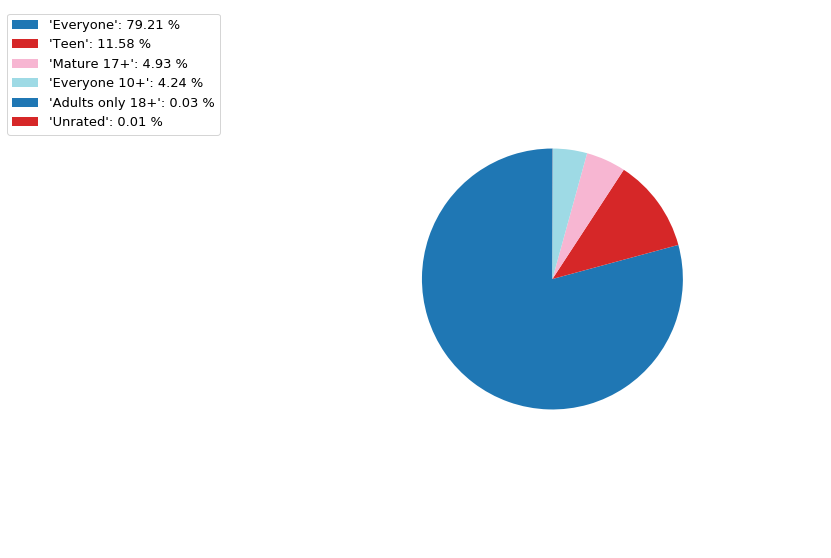

In [16]:
# visualizing 'Content Rating' feature 

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))

x = gplay['Content Rating'].value_counts().index #gets the labels
y = gplay['Content Rating'].value_counts() #gets the count for each label
n = gplay['Content Rating'].value_counts().count() #get the total count for this feature

percent = 100.*y/y.sum()

cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, n//2+1)]


patches, texts = plt.pie(y, colors=colors, startangle=90, radius=0.6)

labels = ['\'{0}\': {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = False #incase you want them to be sorted according to their count

if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=13)

plt.savefig('piechart2.png', bbox_inches='tight')

Taking a look at the `'Content Rating'` feature shows us that:
- Everyone Rating is dominating the market.

For `'Content Rating'`, We will turn them into numeric values.

In [17]:
rating_cat = gplay['Content Rating'].unique()
rating_dict = {rating_cat[i]:i for i in range(len(rating_cat))}
gplay['Content Rating'] = gplay['Content Rating'].map(rating_dict).astype(int)

After cleaning and reformating our features, we can have more info about our dataset.

In [18]:
gplay.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity


In [19]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 9 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int32
Genres            9360 non-null object
dtypes: float64(3), int32(2), int64(2), object(2)
memory usage: 658.1+ KB


In [20]:
gplay.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating
count,9360.000000,9.360000e+03,9.360000e+03,9.360000e+03,9360.000000,9360.000000,9360.000000
mean,4.191838,5.143767e+05,2.373330e+07,1.790875e+07,0.068910,0.961279,0.350214
std,0.515263,3.145023e+06,2.326294e+07,9.126637e+07,0.253315,15.821640,0.783552
min,1.000000,1.000000e+00,1.000000e+06,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.867500e+02,6.000000e+06,1.000000e+04,0.000000,0.000000,0.000000
50%,4.300000,5.955000e+03,1.500000e+07,5.000000e+05,0.000000,0.000000,0.000000
75%,4.500000,8.162750e+04,3.400000e+07,5.000000e+06,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,400.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4B6408C08>,
      dtype=object)

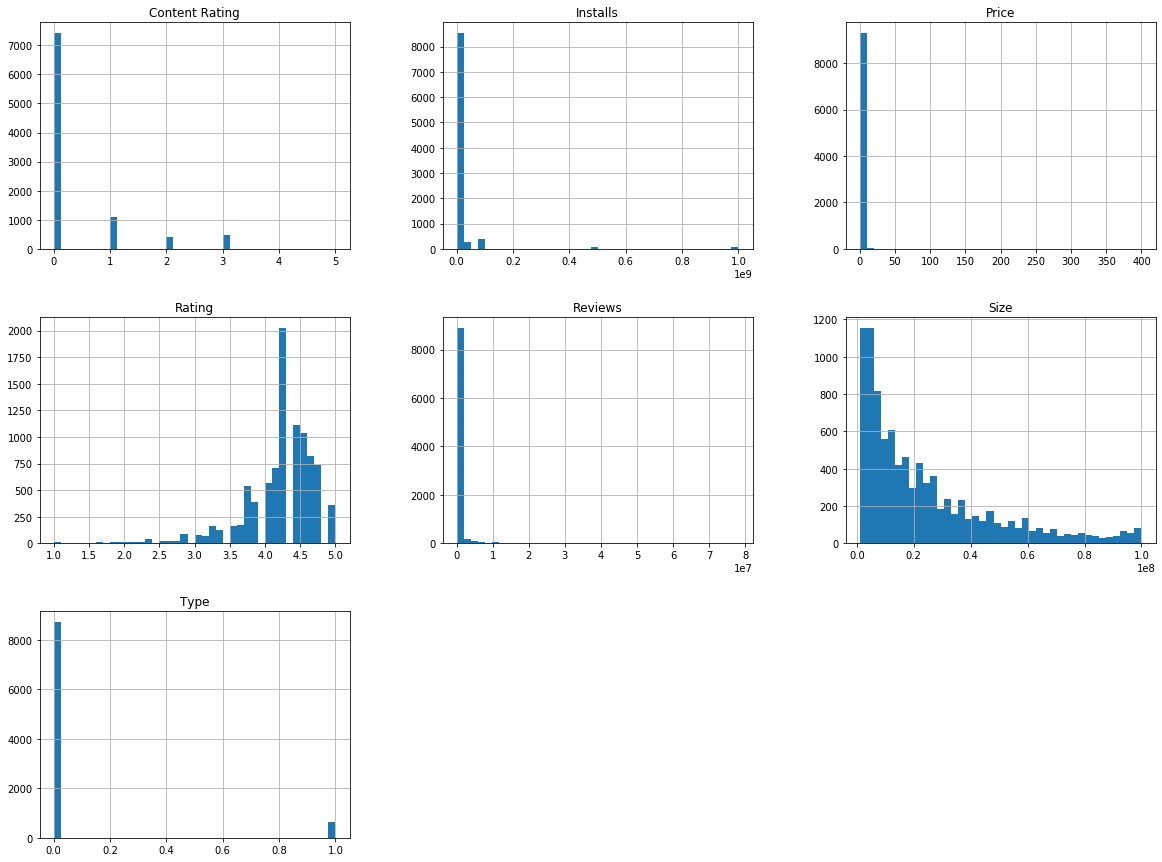

In [21]:
%matplotlib inline
gplay.hist(bins=40, figsize=(20,15))

From the histograms, we find out that:
- the **Everyone** Content rating is dominating the app store just like what we figured out from the pie chart.
- not everyone who rated an app wrote a review.
- the app store are mostly free apps.

# Create a Test Set

After Taking a quick look at the Data Structure of our attributes and changing some of them to get a better visualization and be able to get the most out of them when fed into a machine learning algorithm, we will now create a Test set before taking any major steps.

We will create a test set now before we find any intersting patterns that maybe will influence us to select a particular kind of Machine Learning model which may in turn give us an optimistic estimate, which will make our system not perform as well as expected after launch due to **Snooping bias**.

We will need make another assumption here to create a Test set which isnt skewed, with no bias, and representative for the whole data set, we will be using **Stratified sampling** on `'Category'` feature assuming it is the most important feature for the rating dataset. 
**Stratified sampling** is in most cases a much better option than **Random sampling** which can be skewed.

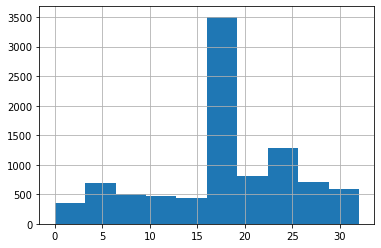

In [22]:
category_cat = gplay["Category"].unique()
category_dict = {category_cat[i]:i for i in range(len(category_cat))}
gplay["Category_cat"] = gplay["Category"].map(category_dict).astype(int)
gplay["Category_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(gplay, gplay["Category_cat"]):
    strat_train_set = gplay.loc[train_index]
    strat_test_set = gplay.loc[test_index]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


Now, lets check and see if the test_set follows histogram of `Category_cat` for the full dataset.

In [24]:
strat_test_set["Category_cat"].value_counts() / len(strat_test_set)

18.0    0.152244
17.0    0.103632
25.0    0.064103
27.0    0.035256
19.0    0.034722
22.0    0.033120
13.0    0.031517
16.0    0.029915
6.0     0.029915
21.0    0.026709
11.0    0.026709
4.0     0.026175
23.0    0.025641
20.0    0.024038
24.0    0.022970
31.0    0.020833
7.0     0.019231
26.0    0.019231
8.0     0.017628
9.0     0.015491
30.0    0.014957
3.0     0.014423
32.0    0.012821
12.0    0.011218
29.0    0.009081
14.0    0.007479
1.0     0.007479
5.0     0.007479
10.0    0.006410
0.0     0.006410
15.0    0.005342
28.0    0.004808
2.0     0.003739
Name: Category_cat, dtype: float64

After making our desired test_set, we can now drop the new attribute `'Category_cat'` to get the original databack.

In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Category_cat", axis=1, inplace=True)

## Discover and Visualize
After putting the test_set aside, we can go into more depth in exploring the train_set. Since our data set is quite small, we can work directly on the full set. First we will need a copy to not alter the original dataset

In [26]:
gplay = strat_train_set.copy()